# Scatterplot
---
Scatterplot adalah metode yang berguna untuk membandingkan variabel satu sama lain. Scatterplot terlihat mirip dengan [Line Plot]() karena keduanya memetakan variabel independen dan dependen pada grafik 2-dimensi. Perbedaannya, scatterplot direpresentasikan dengan _data points_ yang tidak terhubung oleh garis. Data dalam scatterplot dianggap mengekspresikan suatu tren. Dengan anaisis lebih lanjut, scatterplot dapat digunakan untuk _tools_ seperti regresi.

## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
london_crime = pd.read_csv("london_crime_by_lsoa.csv")

### Dengan menggunakan Scatterplot, kita dapat memperoleh informasi sebagai berikut:

---
#### Question: Pada bulan apa jumlah kejahatan/kriminal di London mencapai angka tertinggi selama tahun 2008-2016?

Sebelumnya, kita sudah mendapatkan informasi mengenai tren tahunan jumlah kejahatan/kriminal di London baik itu berdasarkan wilayah maupun kategorinya. Menggunakan scatterplot, kita dapat mengetahui tren bulanan jumlah kejahatan/kriminal di London dengan representasi _data points_.

In [13]:
month_crime = london_crime.drop(["lsoa_code","borough","major_category","minor_category","year"], axis=1)
month_crime = month_crime.groupby("month").sum()
month_crime = month_crime.reset_index()
month_crime

,month,value
0,1,530247
1,2,500537
2,3,551795
3,4,520648
4,5,552704
5,6,549041
6,7,563076
7,8,532784
8,9,522377
9,10,558252


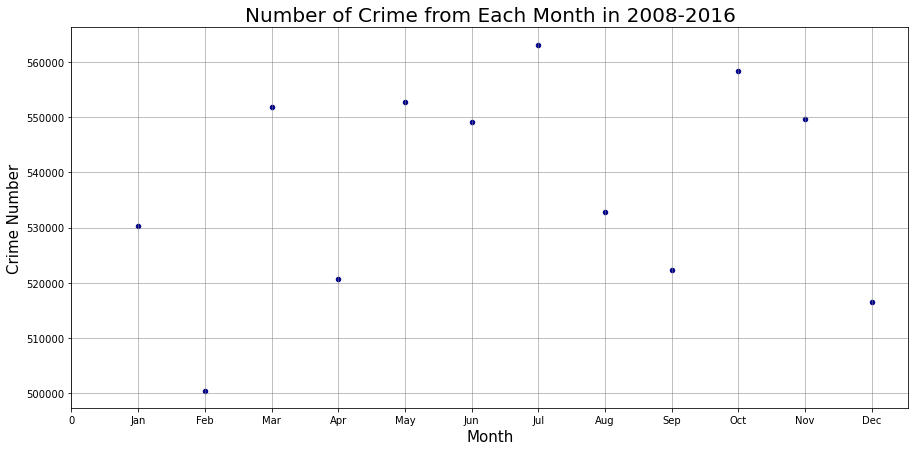

In [15]:
months = np.arange(len(month_crime["month"])+1)
name_of_months=['0','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

month_crime.plot(kind="scatter", x="month",y="value",figsize=(15,7), color="darkblue")
plt.title("Number of Crime from Each Month in 2008-2016", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Crime Number", fontsize=15)
plt.xticks(months, name_of_months)
plt.grid(color="grey", linewidth=0.5)
plt.show()

Bulan yang sama selama tahun 2008-2016 dijumlahkan dan dihasilkan angka kasus kejahatan/kriminal di London yang paling tinggi adalah bulan Juli dan yang paling rendah adalah bulan Februari.

---
#### Question: Pada bulan apa jumlah kasus kejahatan/kriminal di London mencapai angka tertinggi pada tahun 2008?

Lebih spesifiknya lagi, kita dapat melihat di tahun 2008, bulan apa jumlah kasus kejahatan/kriminal di London mencapai angka tertinggi.

Catatan: kita dapat memperoleh informasi ini dengan [Bar Chart](), hanya berbeda representasinya.

In [16]:
london_crime

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [20]:
month_crime2008 = london_crime.drop(["lsoa_code","borough","major_category","minor_category"], axis=1).set_index("year")
month_crime2008 = month_crime2008.loc[2008]
month_crime2008 = month_crime2008.reset_index().drop("year", axis=1)
month_crime2008 = month_crime2008.groupby("month").sum()
month_crime2008 = month_crime2008.reset_index()
month_crime2008

,month,value
0,1,65419
1,2,62626
2,3,61343
3,4,59640
4,5,62587
5,6,62290
6,7,64126
7,8,59959
8,9,58414
9,10,63354


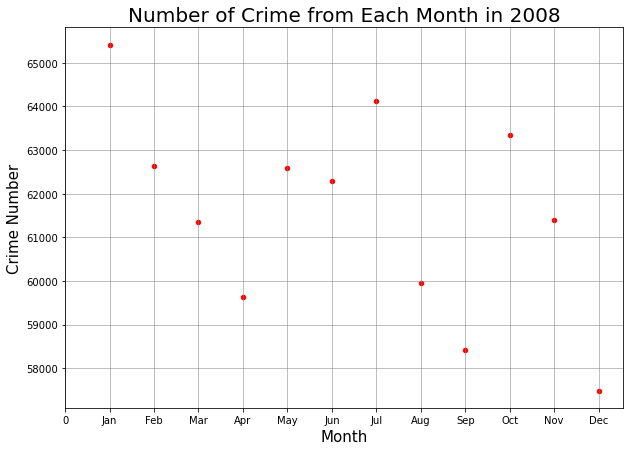

In [23]:
months = np.arange(len(month_crime["month"])+1)
name_of_months=['0','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

month_crime2008.plot(kind="scatter", x="month",y="value",figsize=(10,7), color="red")
plt.title("Number of Crime from Each Month in 2008", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Crime Number", fontsize=15)
plt.xticks(months, name_of_months)
plt.grid(color="grey", linewidth=0.5)
plt.show()

Pada tahun 2008, jumlah kasus kejahatan/kriminal mencapai angka tertinggi di bulan Januari dan mencapai angka terendah di bulan Desember. Dengan scatterplot, kita bisa membandingkan jumlah kasus kejahatan/kriminal setiap bulannya di tahun-tahun tertentu.

### Selain dari informasi yang sudah dilampirkan sebelumnya, dengan menggunakanScatterplot juga dapat memperoleh informasi tertentu yang lebih spesifik lagi, seperti:
1. Tren bulanan kategori kasus kejahatan/kriminal tertentu di wilayah tertentu (misal tren bulanan Theft and Handling di City of London),
2. Tren bulanan kategori kasus kejahatan/kriminal tertentu di wilayah tertentu pada waktu/rentang waktu tertentu (misal tren bulanan Other Notifiable Offences di Croydon pada tahun 2012-2016), dst.

# Conclusions

Dengan menggunakan Scatterplot kita dapat menyimpulkan beberapa informasi dari kumpulan data London Crime, 2008-2016, yaitu:

Berdasarkan jumlah setiap bulannya selama tahun 2008-2016, bulan Juli adalah bulan yang memiliki jumlah kasus kejahatan/kriminal tertinggi dan bulan Februari memiliki jumlah kasus terendah. Sedangkan di 2008, bulan Januari adalah bulan yang memiliki jumlah kasus kejahatan/kriminal tertinggi dan bulan Desember memiliki jumlah kasus terendah. Jika divisualisasikan lebih lanjut, diduga terdapat perbedaan tren bulanan setiap tahunnya.